In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
data.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [7]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
data.drop('name', axis='columns', inplace=True )

In [12]:
data.shape

(4340, 7)

In [13]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
data['current_year'] = 2021

In [15]:
data['yrs_old'] = data['current_year'] - data['year']
data.drop(['current_year','year'] , axis=1 , inplace=True)
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,yrs_old
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['fuel'] = le.fit_transform(data['fuel'])
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,yrs_old
0,60000,70000,4,Individual,Manual,First Owner,14
1,135000,50000,4,Individual,Manual,First Owner,14
2,600000,100000,1,Individual,Manual,First Owner,9
3,250000,46000,4,Individual,Manual,First Owner,4
4,450000,141000,1,Individual,Manual,Second Owner,7


In [22]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,selling_price,km_driven,fuel,yrs_old,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,4,14,1,0,1,0,0,0,0
1,135000,50000,4,14,1,0,1,0,0,0,0
2,600000,100000,1,9,1,0,1,0,0,0,0
3,250000,46000,4,4,1,0,1,0,0,0,0
4,450000,141000,1,7,1,0,1,0,1,0,0


In [23]:
data['fuel'].unique()

array([4, 1, 0, 3, 2])

In [24]:
X = data.drop('selling_price' , axis=1)
y = data['selling_price']

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [26]:
print(model.feature_importances_)

[0.24863394 0.12998089 0.2422882  0.04672304 0.00867538 0.29282869
 0.00085601 0.02410886 0.00139645 0.00450852]


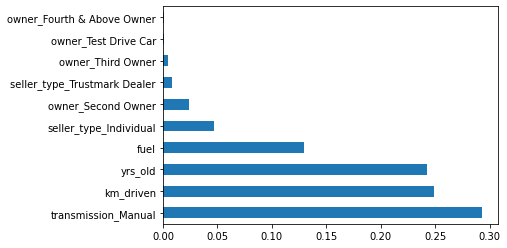

In [29]:
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

# **Train Test Splite**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [31]:
X_train.shape

(3906, 10)

In [32]:
X_test.shape

(434, 10)

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [51]:
prediction = regressor.predict(X_test)
prediction

array([ 945150.51783388,  561875.0810019 ,  326255.04738361,
        286230.00245913,  440365.66996451,  174273.68978027,
        653549.69958114,  211175.13117801,  552689.54598281,
        329298.52254536,  827275.12404551,  280722.7704617 ,
        676631.1038248 ,  145913.7024919 ,   86928.06006476,
        254315.72437986,  276973.12155862,  479932.22209722,
        296752.54754868,  652276.67649302,  298870.54645593,
        546707.27290127,  145086.49945815,  439969.96947708,
        685916.26636474,  275161.32632249,  534120.83141977,
        458636.94564452,  626768.644494  ,  258828.74739226,
        741684.90594996,  120222.32981249,  436012.99960397,
        812539.19955871,  520343.84980113,  419518.93292164,
        308467.5107561 ,  293893.20418246,  280311.68522003,
        441409.87424669,  245242.37894652,  211100.73143351,
        121084.88550092,  233850.190348  ,  426997.51380509,
        754473.20835304,  662070.61113969,  241997.95322096,
        300988.58960737,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


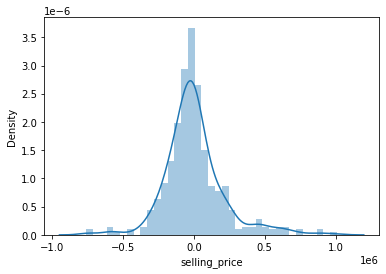

In [52]:
sns.distplot(y_test-prediction)

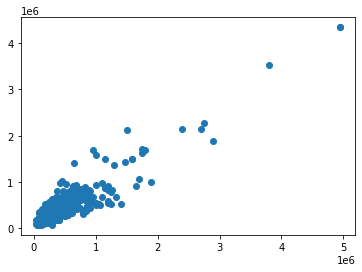

In [53]:
plt.scatter(y_test,prediction)

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8338931885938933

In [57]:
import pickle

file = open('c_p_p.pkl', 'wb')

pickle.dump(regressor, file)